# Xente Data Exploration
## RFM Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
try:
    df = pd.read_csv('../data/raw/data.csv')
    print("Dataset loaded successfully!")
    print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("Error: data.csv not found. Make sure it's in the 'data/raw/' directory.")

df.head()

Dataset loaded successfully!
The dataset has 95662 rows and 16 columns.


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [4]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


Distribution of Fraudulent vs. Non-Fraudulent Transactions:
FraudResult
0    95469
1      193
Name: count, dtype: int64

Percentage Distribution:
FraudResult
0    99.798248
1     0.201752
Name: proportion, dtype: float64


/tmp/ipykernel_11316/1808416152.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FraudResult', data=df, palette=['#3498db', '#e74c3c'])


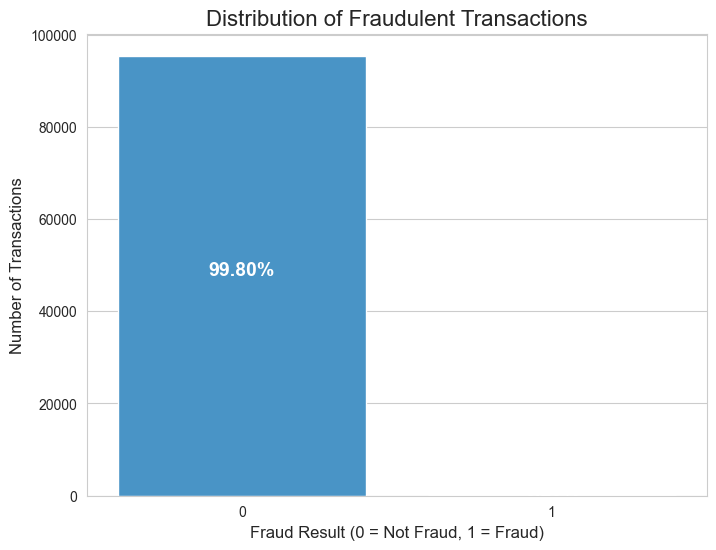

In [ ]:
# --- Analyze the Target Variable: FraudResult ---

fraud_counts = df['FraudResult'].value_counts()
print("Distribution of Fraudulent vs. Non-Fraudulent Transactions:")
print(fraud_counts)

fraud_percentage = df['FraudResult'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:")
print(fraud_percentage)

# Visualizing distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudResult', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of Fraudulent Transactions', fontsize=16)
plt.xlabel('Fraud Result (0 = Not Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
# Annotate the bars 
plt.text(0, fraud_counts[0]/2, f'{fraud_percentage[0]:.2f}%', ha='center', color='white', fontsize=14, weight='bold')
plt.text(1, fraud_counts[1]/2, f'{fraud_percentage[1]:.2f}%', ha='center', color='white', fontsize=14, weight='bold')
plt.show()

Summary statistics for Amount (Non-Fraudulent):
count    9.546900e+04
mean     3.627723e+03
std      4.035711e+04
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.500000e+03
max      2.400000e+06
Name: Amount, dtype: float64


Summary statistics for Amount (Fraudulent):
count    1.930000e+02
mean     1.535272e+06
std      2.100525e+06
min     -9.000000e+05
25%      5.000000e+05
50%      6.000000e+05
75%      2.000000e+06
max      9.880000e+06
Name: Amount, dtype: float64


/tmp/ipykernel_11316/553351742.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FraudResult', y='Amount', data=df, palette=['#3498db', '#e74c3c'])


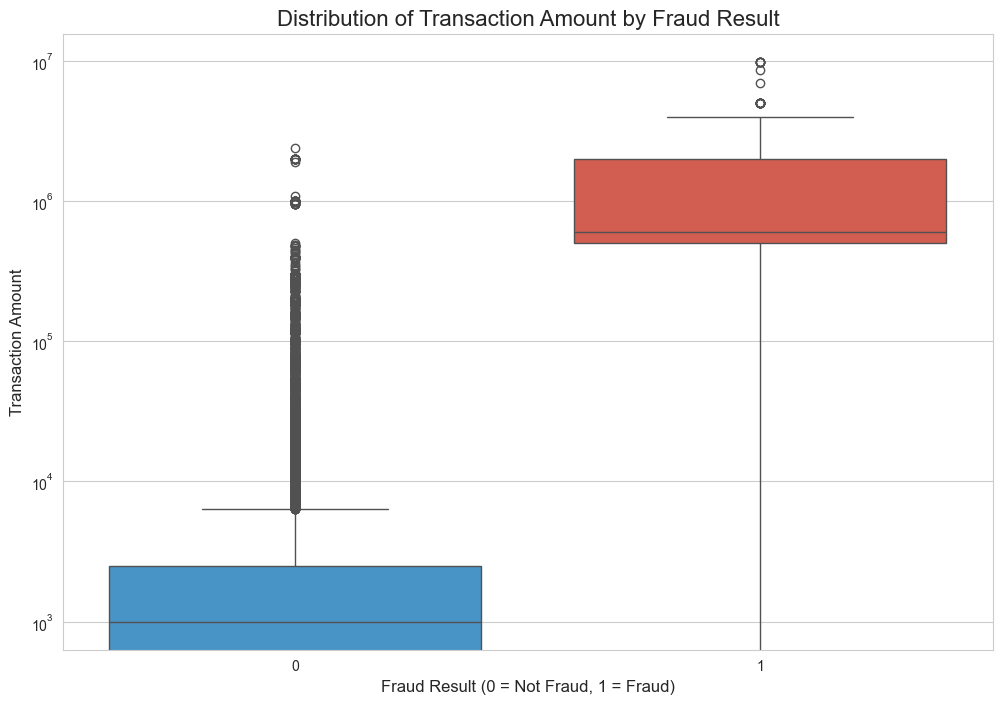

In [6]:
# --- Analyzing Numerical Features: Amount ---

print("Summary statistics for Amount (Non-Fraudulent):")
print(df[df['FraudResult'] == 0]['Amount'].describe())
print("\n" + "="*40 + "\n")
print("Summary statistics for Amount (Fraudulent):")
print(df[df['FraudResult'] == 1]['Amount'].describe())

plt.figure(figsize=(12, 8))
sns.boxplot(x='FraudResult', y='Amount', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of Transaction Amount by Fraud Result', fontsize=16)
plt.xlabel('Fraud Result (0 = Not Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.yscale('log') 
plt.show()

Fraud Counts and Rates by Channel:
FraudResult      0    1  FraudRate
ChannelId                         
ChannelId_1    534    4   0.743494
ChannelId_3  56751  184   0.323176
ChannelId_2  37136    5   0.013462
ChannelId_5   1048    0   0.000000


/tmp/ipykernel_11316/3955647444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_fraud_crosstab.index, y=channel_fraud_crosstab['FraudRate'], palette='viridis')


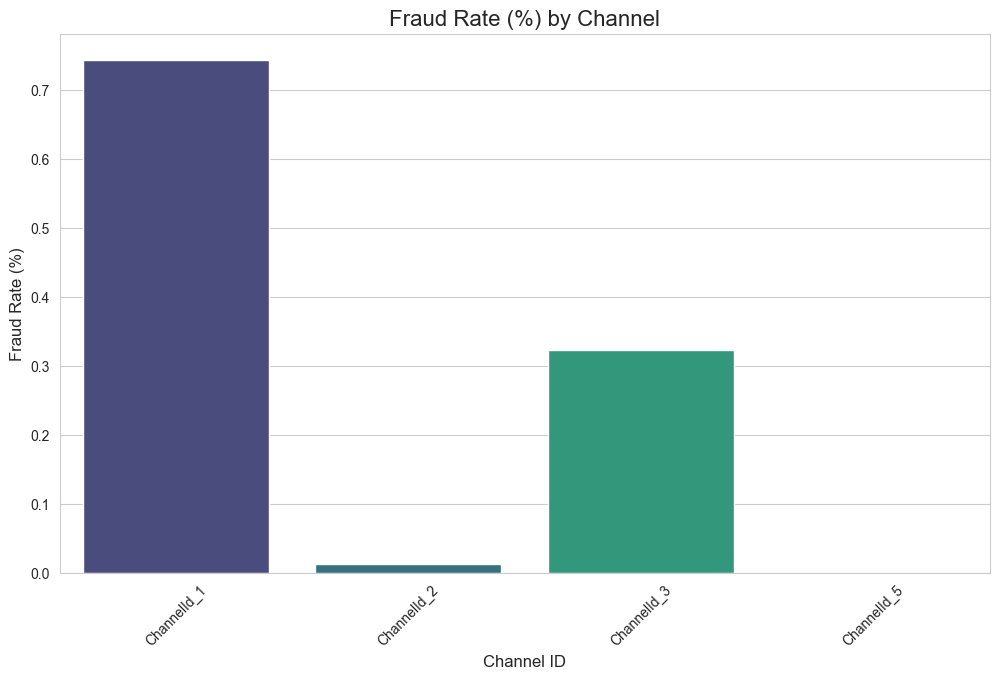

In [7]:
# --- Analyzing Categorical Features: ChannelId ---

channel_fraud_crosstab = pd.crosstab(df['ChannelId'], df['FraudResult'])


channel_fraud_crosstab['FraudRate'] = (channel_fraud_crosstab[1] / (channel_fraud_crosstab[0] + channel_fraud_crosstab[1])) * 100

print("Fraud Counts and Rates by Channel:")
print(channel_fraud_crosstab.sort_values(by='FraudRate', ascending=False))


plt.figure(figsize=(12, 7))
sns.barplot(x=channel_fraud_crosstab.index, y=channel_fraud_crosstab['FraudRate'], palette='viridis')
plt.title('Fraud Rate (%) by Channel', fontsize=16)
plt.xlabel('Channel ID', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()
